In [1]:
import csv
import pandas as pd
import seaborn as sns
sns.set_style("darkgrid")
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
ls ../data

538_approval_polllist.csv    pollster-ratings_528csv.csv
538_approval_topline.csv     raw-polls_528.csv
dkos 18.csv                  special-elections_538.csv
pollster-ratings.csv


In [3]:
dfile = '../data/dkos 18.csv'
dfile2 = '../data/special-elections_538.csv'

In [4]:
dfkos = pd.read_csv(dfile,parse_dates=True,date_parser='date')
df538 = pd.read_csv(dfile2, parse_dates=True)

In [5]:
dfkos.head()

,date,state,District,held_by,winner,18_d_vshare,18_r_vshare,18_marg,16_clinton,16_trump,16_margin,16_marg_diff,12_obama,12_romney,12_margin,12_marg_diff
0,1-May-18,FL,HD-39,(R),(R),0.40,0.60,-0.20,0.39,0.58,-0.19,-0.01,0.43,0.56,-0.12,-0.07
1,1-May-18,FL,HD-114,(D),(D),0.51,0.47,0.04,0.56,0.42,0.14,-0.10,0.50,0.49,0.01,0.03
2,24-Apr-18,AZ,AZ-08,(R),(R),0.47,0.52,-0.05,0.37,0.58,-0.21,0.16,0.37,0.62,-0.25,0.20
3,24-Apr-18,NY,SD-32,(D),(D),0.89,0.02,0.86,0.93,0.05,0.88,-0.02,0.97,0.03,0.94,-0.07
4,24-Apr-18,NY,SD-37,(D),(D),0.57,0.43,0.15,0.59,0.38,0.22,-0.07,0.54,0.45,0.09,0.06


In [6]:
df538.head()

,date,state,istrict,median_inc,%_bach_degree,clinton_over_BO,18_over_lean
0,3/27/18,Alabama,HD-21,65548.0,0.42,0.06,0.24
1,3/13/18,Pennsylvania,18th CD,62283.0,0.35,-0.03,0.22
2,3/13/18,Tennessee,SD-14,48252.0,0.22,-0.08,0.01
3,3/6/18,Oklahoma,HD-51,57202.0,0.18,-0.08,0.21
4,2/27/18,Kentucky,HD-89,37858.0,0.16,-0.05,0.29


In [7]:
dfkos['date']=pd.to_datetime(dfkos['date'], infer_datetime_format=True)
df538['date']=pd.to_datetime(df538['date'], infer_datetime_format=True)
df538['edu_x_inc'] = df538['%_bach_degree']*df538['median_inc']
df538.head()

,date,state,istrict,median_inc,%_bach_degree,clinton_over_BO,18_over_lean,edu_x_inc
0,2018-03-27,Alabama,HD-21,65548.0,0.42,0.06,0.24,27530.16
1,2018-03-13,Pennsylvania,18th CD,62283.0,0.35,-0.03,0.22,21799.05
2,2018-03-13,Tennessee,SD-14,48252.0,0.22,-0.08,0.01,10615.44
3,2018-03-06,Oklahoma,HD-51,57202.0,0.18,-0.08,0.21,10296.36
4,2018-02-27,Kentucky,HD-89,37858.0,0.16,-0.05,0.29,6057.28


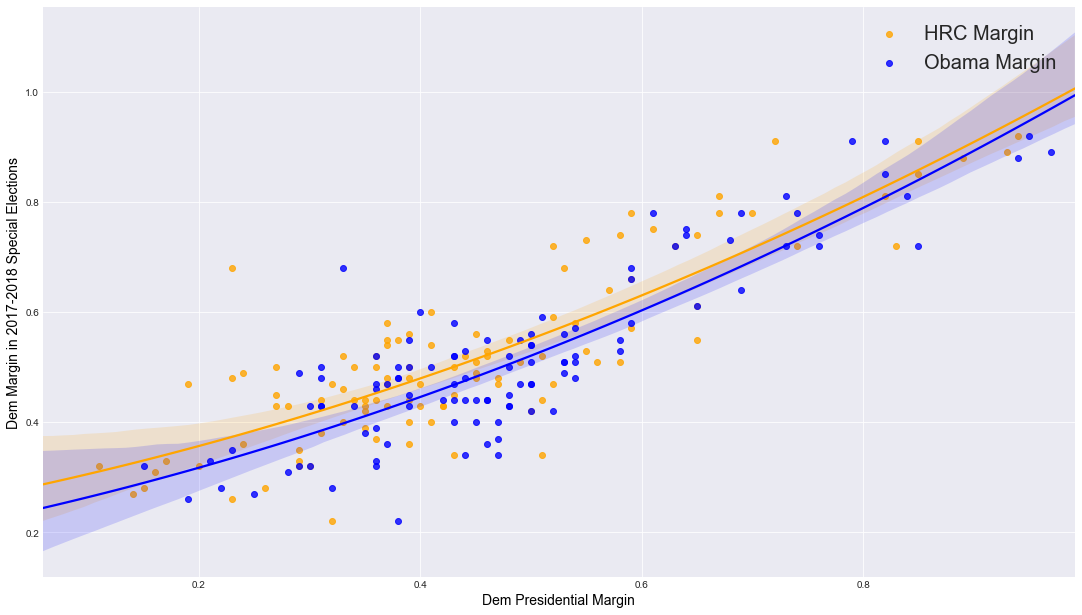

In [101]:
hrc = sns.regplot(x='16_clinton', y='18_d_vshare', data=dfkos, color='orange', scatter=True, marker='o', order=2, 
            label='HRC Margin')
bo = sns.regplot(x='12_obama', y='18_d_vshare', data=dfkos, color='blue', scatter=True, marker='o', order=2, 
           label='Obama Margin')
plt.xlabel('Dem Presidential Margin', fontsize=14, color='black')
plt.ylabel('Dem Margin in 2017-2018 Special Elections', fontsize=14, color='black')
plt.legend(fontsize=20)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)

In [42]:
dfkos.head()

,date,state,District,held_by,winner,18_d_vshare,18_r_vshare,18_marg,16_clinton,16_trump,16_margin,16_marg_diff,12_obama,12_romney,12_margin,12_marg_diff
0,2018-05-01,FL,HD-39,(R),(R),0.40,0.60,-0.20,0.39,0.58,-0.19,-0.01,0.43,0.56,-0.12,-0.07
1,2018-05-01,FL,HD-114,(D),(D),0.51,0.47,0.04,0.56,0.42,0.14,-0.10,0.50,0.49,0.01,0.03
2,2018-04-24,AZ,AZ-08,(R),(R),0.47,0.52,-0.05,0.37,0.58,-0.21,0.16,0.37,0.62,-0.25,0.20
3,2018-04-24,NY,SD-32,(D),(D),0.89,0.02,0.86,0.93,0.05,0.88,-0.02,0.97,0.03,0.94,-0.07
4,2018-04-24,NY,SD-37,(D),(D),0.57,0.43,0.15,0.59,0.38,0.22,-0.07,0.54,0.45,0.09,0.06


In [59]:
dfkos.columns

Index(['date', 'state', 'District', 'held_by', 'winner', '18_d_vshare',
       '18_r_vshare', '18_marg', '16_clinton', '16_trump', '16_margin',
       '16_marg_diff', '12_obama', '12_romney', '12_margin', '12_marg_diff'],
      dtype='object')

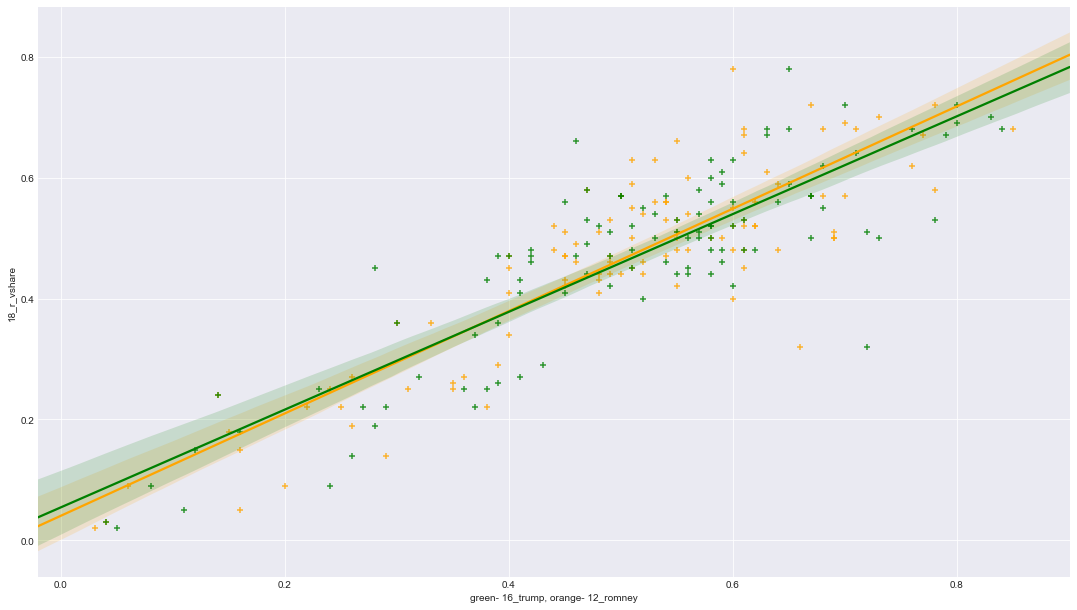

In [26]:
sns.regplot(x='12_romney', y='18_r_vshare', data=dfkos, color='orange', scatter=True, marker='+', order=1)
sns.regplot(x='16_trump', y='18_r_vshare', data=dfkos, color='green', scatter=True, marker='+', order=1)
plt.xlabel('green- 16_trump, orange- 12_romney')
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)

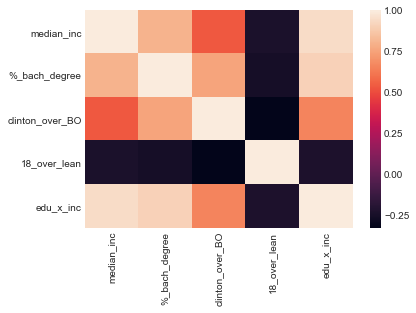

In [65]:
df538.corr()
sns.heatmap(df538.corr())

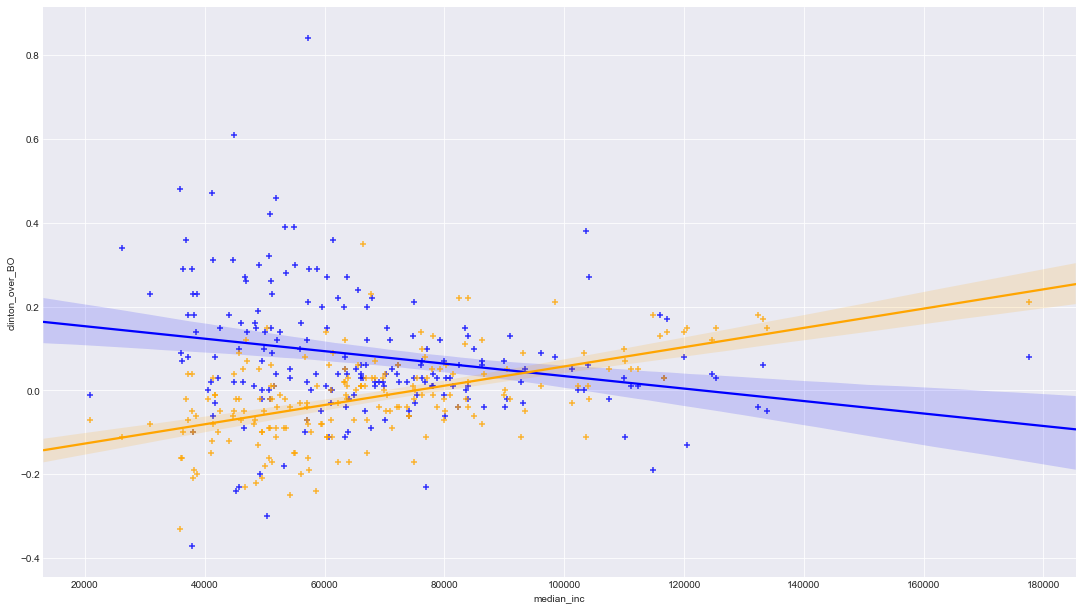

In [66]:
sns.regplot(x='median_inc', y='18_over_lean', data=df538, color='b', scatter=True, marker='+', order=1)
sns.regplot(x='median_inc', y='clinton_over_BO', data=df538, color='orange', scatter=True, marker='+', order=1)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)

/anaconda3/lib/python3.6/site-packages/seaborn/regression.py:277: RuntimeWarning: invalid value encountered in log
  grid = np.c_[np.ones(len(grid)), np.log(grid)]


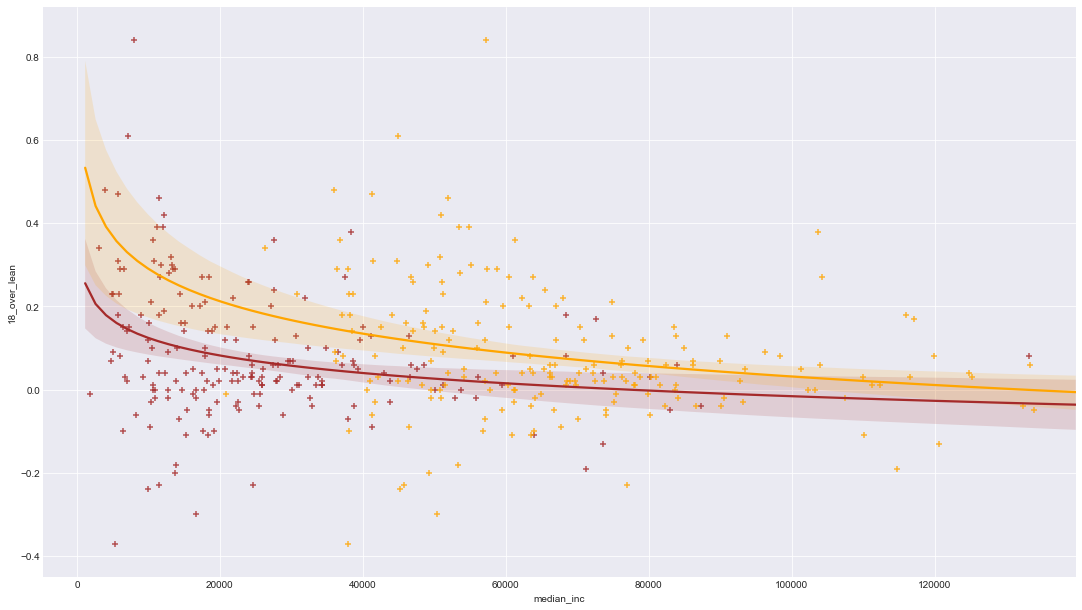

In [114]:
sns.regplot(x='edu_x_inc', y='18_over_lean', data=df538, color='brown', scatter=True, marker='+', order=1, logx=True)
sns.regplot(x='median_inc', y='18_over_lean', data=df538, color='orange', scatter=True, marker='+', order=1, logx=True)
fig = matplotlib.pyplot.gcf()

fig.set_size_inches(18.5, 10.5)

                 median_inc  %_bach_degree  clinton_over_BO  18_over_lean  \
median_inc         1.000000       0.806168         0.536792     -0.232219   
%_bach_degree      0.806168       1.000000         0.756719     -0.253885   
clinton_over_BO    0.536792       0.756719         1.000000     -0.326621   
18_over_lean      -0.232219      -0.253885        -0.326621      1.000000   
edu_x_inc          0.943468       0.908359         0.658360     -0.226237   

                 edu_x_inc  
median_inc        0.943468  
%_bach_degree     0.908359  
clinton_over_BO   0.658360  
18_over_lean     -0.226237  
edu_x_inc         1.000000  


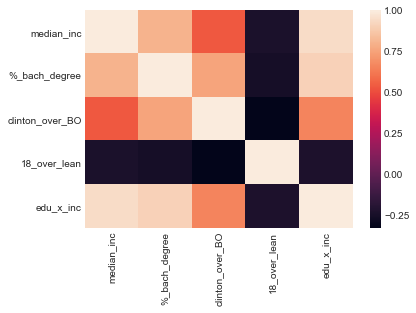

In [74]:
print(df538.corr())
sns.heatmap(df538.corr())

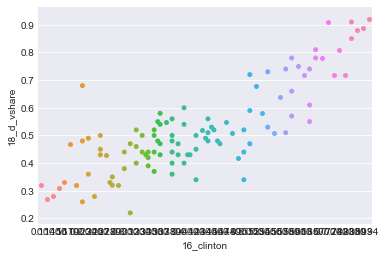

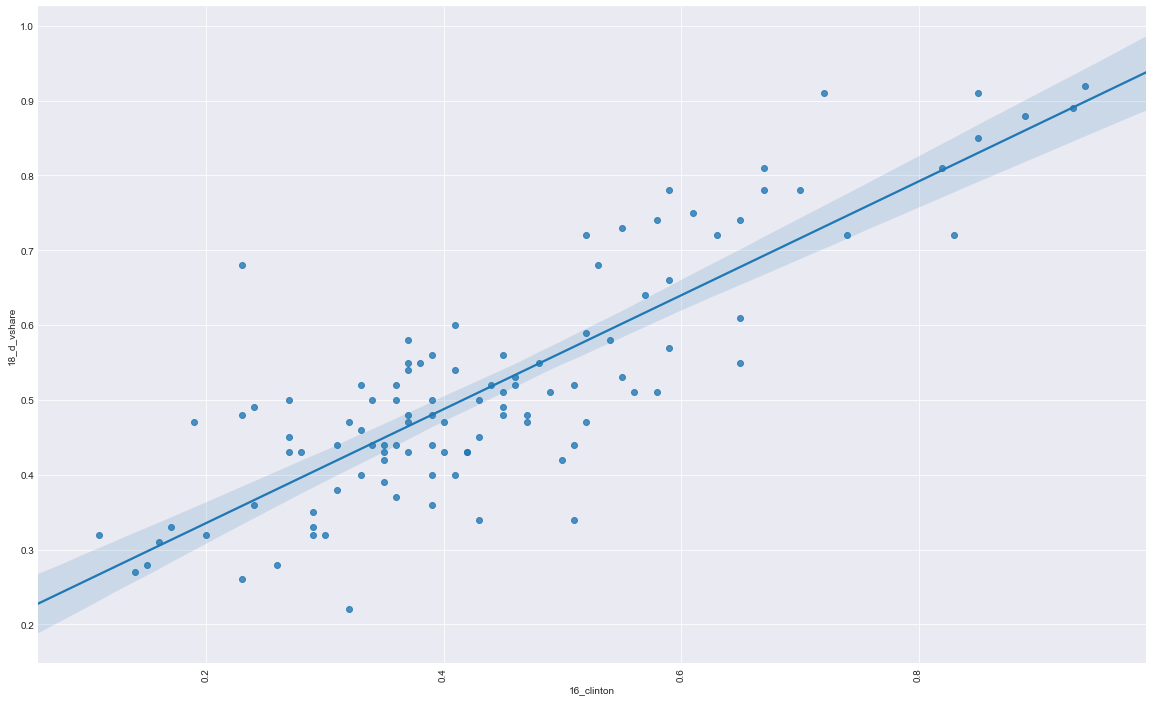

In [112]:
sns.swarmplot(x='16_clinton' , y='18_d_vshare' , data=dfkos)
sns.regression.lmplot(x='16_clinton' , y='18_d_vshare' , data=dfkos)

plt.xticks(rotation='vertical')
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18, 10.5)
plt.show()

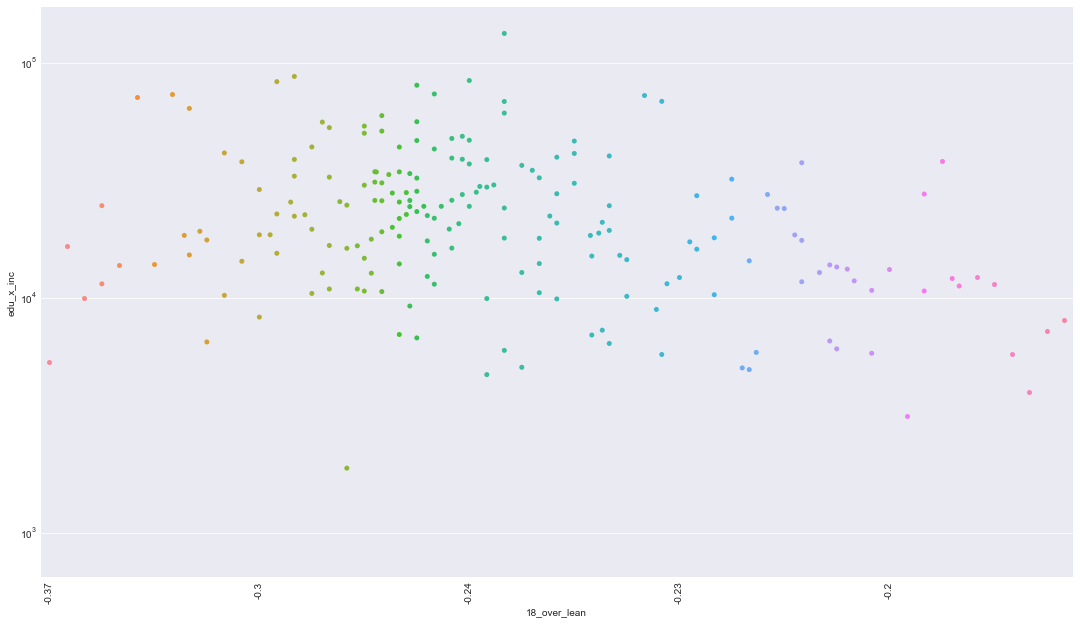

In [94]:
sns.swarmplot(x='18_over_lean' , y='edu_x_inc' , data=df538)
plt.xticks(rotation='vertical')

plt.locator_params(axis='x', nbins=5, tight=True)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)
plt.yscale('log')
plt.show()

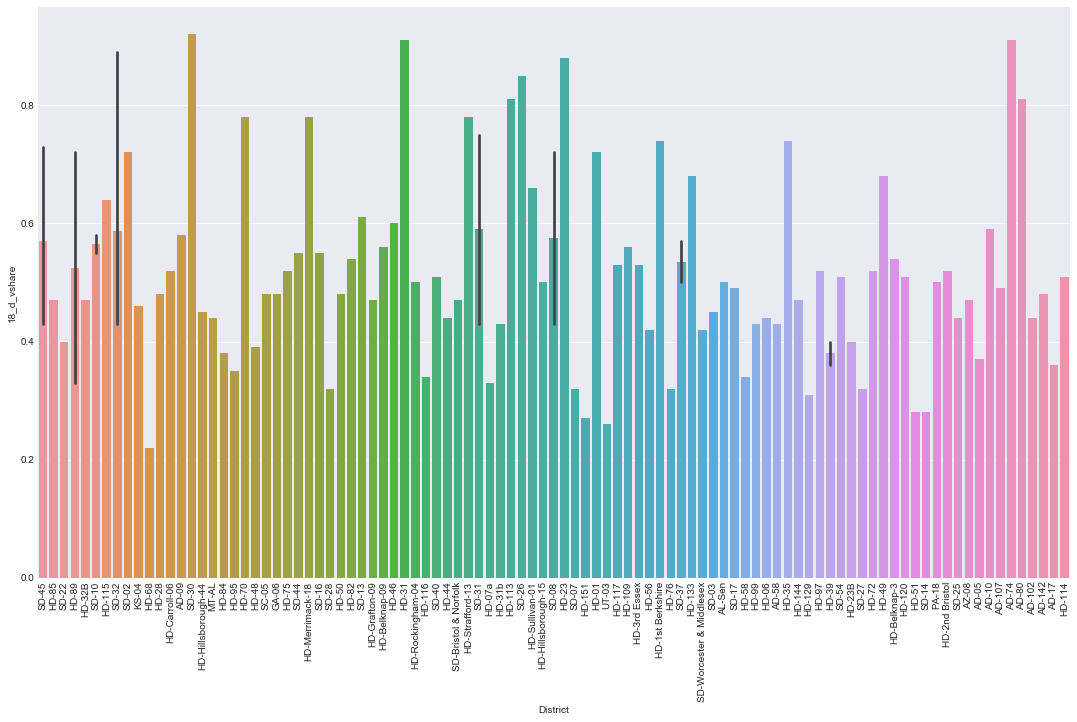

In [93]:

sns.barplot(x='District', y='18_d_vshare', data=dfkos.sort_values(by='date'))
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)
plt.xticks(rotation='vertical', )
plt.show()

In [81]:
dfkos.columns

Index(['date', 'state', 'District', 'held_by', 'winner', '18_d_vshare',
       '18_r_vshare', '18_marg', '16_clinton', '16_trump', '16_margin',
       '16_marg_diff', '12_obama', '12_romney', '12_margin', '12_marg_diff'],
      dtype='object')